# Gemini GMOS Wavelength Solutions

In [3]:
%matplotlib notebook

In [25]:
# imports
import os
from matplotlib import pyplot as plt
from pkg_resources import resource_filename

import numpy as np

from scipy.io import readsav 

from astropy.io import fits
from astropy.table import Table
from astropy import units

from linetools import utils as ltu

from pypeit import utils
from pypeit.core.wave import airtovac
from pypeit.core.wavecal import waveio
from pypeit.core.wavecal import autoid
from pypeit.core.wavecal import templates
from pypeit.spectrographs import util

# Load up the Archive solution (note its filename is likely to change)
    This is the Hamamatsu

In [6]:
gfile = os.path.join(resource_filename('pypeit','data'), 'arc_lines', 'reid_arxiv', 'gemini_gmos_r400.fits')

In [8]:
gmos_arxiv = Table.read(gfile)

In [9]:
gmos_arxiv

wave,flux
float64,float64
4676.7833325443,611.587714726498
4678.248083724636,517.4697759145129
4679.712628442459,482.30304766565797
4681.176968487596,447.6791425090374
4682.641105642625,482.9107544724855
4684.105041682897,411.83982373876177
4685.568778376539,529.370564602888
4687.032317484475,400.133159231216
4688.495660760437,388.6463471897645


## Plot

<IPython.core.display.Javascript object>


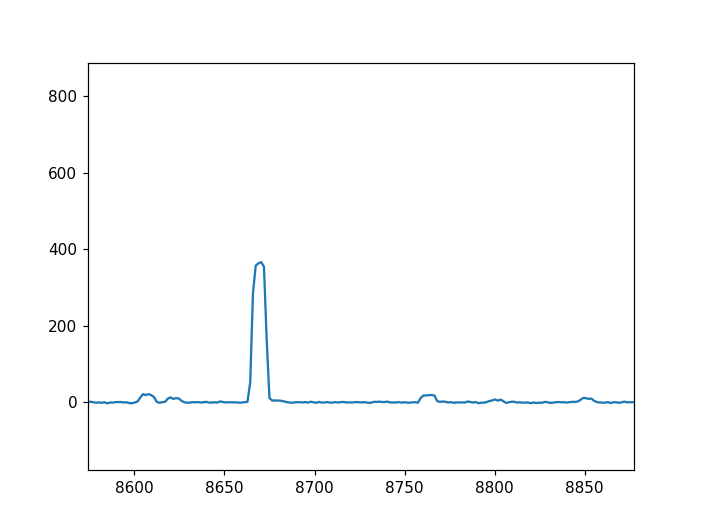

In [19]:
plt.clf()
ax = plt.gca()
ax.plot(gmos_arxiv['wave'], gmos_arxiv['flux'])
plt.show()

# Load up a failed solution (for the spectrum only)

## Used pypeit_show_wvcalib on an E2V R400

### det = 1

In [17]:
tcent = [83.0885, 233.791, 598.552, 712.557, 939.3136]
wvcent = [4766.2, 4966.46, 5455.15, 5608.29, 5913.72]

### det = 2

In [18]:
tcent = [267.805,459.288,601.4933,744.5348,975.1518]
wvcent = [6418.08,6679.13,6873.19,7069.17,7386.01]

### det = 3

In [20]:
tcent = [17.85776,177.69496,452.41666,683.00582,858.0848]
wvcent = [7505.94,7726.33,8105.9214,8426.963,8670.325]

# B600

In [4]:
xidl_file = '/home/xavier/local/idl/xidl/Spec/Longslit/calib/linelists/GMOS_CuAr_B600_blue.sav'

In [7]:
xidl_dict = readsav(xidl_file)

In [14]:
xidl_dict['calib']

rec.array([(b'POLY', 3, array([ 796.57055664, 1412.9543457 ]), 3., 3., 3, 0, 10, 1, 0.64194887, array([[ 4.75834203e+03],
       [ 1.28514872e+03],
       [ 1.62093727e+01],
       [-1.10544281e+00]]), 4722.7538052, 1.81778704)],
          dtype=[(('func', 'FUNC'), 'O'), (('nord', 'NORD'), '>i4'), (('nrm', 'NRM'), 'O'), (('lsig', 'LSIG'), '>f4'), (('hsig', 'HSIG'), '>f4'), (('niter', 'NITER'), '>i4'), (('minpt', 'MINPT'), '>i4'), (('maxrej', 'MAXREJ'), '>i4'), (('flg_rej', 'FLG_REJ'), '>i2'), (('rms', 'RMS'), '>f8'), (('ffit', 'FFIT'), 'O'), (('wave_cen', 'WAVE_CEN'), '>f8'), (('disp_cen', 'DISP_CEN'), '>f8')])

In [12]:
#nspec = xidl_dict['archive_arc'].shape[0]
npix = xidl_dict['archive_arc'].size
npix

1554

In [23]:
calib['NRM'][0]

array([ 796.57055664, 1412.9543457 ])

In [36]:
calib = xidl_dict['calib']
wv_air = templates.poly_val(calib['FFIT'][0], np.arange(npix),
                       calib['NRM'][0])#, calib['NORD'])
wv_vac = airtovac(wv_air*units.AA)

In [38]:
wv_vac

<Quantity [3332.45499376, 3334.21686955, 3335.97882531, ..., 6149.56033136,
           6151.42360044, 6153.28692028] Angstrom>

## Plot

<IPython.core.display.Javascript object>


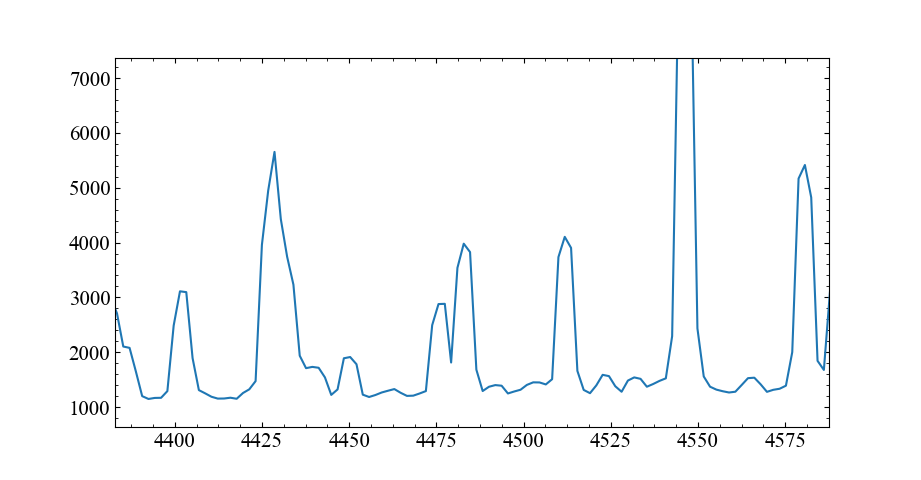

In [41]:
plt.clf()
ax=plt.gca()
ax.plot(wv_vac, xidl_dict['archive_arc'])
plt.show()